In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instan
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99376305],
       [9.96223084]])

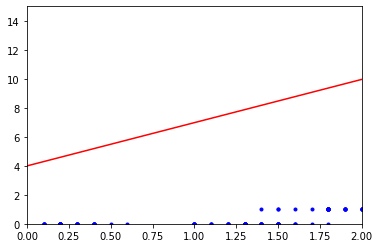

In [27]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

In [ ]:
np.linalg.pinv(X_b).dot(y)

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
                 

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [20]:
# Building logistic Iris Classifier
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int_) # 1 if Iris virginica, else 0

In [22]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

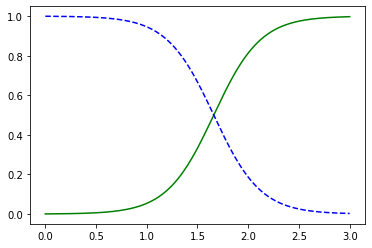

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica") # + more Matplotlib code to make the image look pretty


In [34]:
log_reg.predict([[1.7], [1.6], [1.5]])

array([1, 0, 0])

In [35]:
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [36]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [37]:
# Exercises
# 1. Anything but the Normal Equation (Too computationally expensive)
# 2. Normal Equation or SVD approach doesn't need scaling. Logistic Regression, You can normalize feature scales
# 3. No, Logistic Regression cost function is convex.
# 4. If the optimization problem is convex, there is no local minimum. Else, SGD and Mini Batch GD don't truly converge so they will vary.
# 5. The learning rate could be too high and so the algorithm is diverging. If the training error isn't going up, then you are overfitting and should stop training early.
# 6. No, it's progress varies. You could save the model over intervals then once it stops improving over a long period of time, use the best interval as your model.
# 7. SGD reaches optimal solution the fastest, Batch GD actually converges at the optimal minimum. The others can converge by adding a stop threshold
# 8. You are overfitting. Reduce polynomial degree. You can scale using StandardScaler or MinMaxScaler, Then use a regression model like ridge regression to add a penalty term or use a higher alpha
# 9. High bias b/c it is not fitting the training data well. Reduce A for stronger parameters (You likely have a weak model).
# 10. a) Ridge regression normalizes to new data better than linear regression (without regularization). 
# 10. b) Lasso does well when there are a small number of significant parameters. Ridge works well when there are a large number of contributing parameters (All with relatively same magnitude).
# 10. c) Elastic Net over Lasso for large number of parameters.
# 11. Implement 2 logistic regression models because there are 2 distinct values (with 2 options) that contribute to a classification. One softmax regression only applies to a single classification.
# 12. 